In [1]:
import torch
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm 

# x = torch.linspace(-0.748766713922161, -0.748766707771757, 1000, dtype=torch.double).to(device)
# y = torch.linspace(0.123640844894862, 0.123640851045266, 1000,  dtype=torch.double).to(device)
x = torch.linspace(-1.5, 1, 1000).to(device)
y = torch.linspace(-1.5, 1, 1000).to(device)
rx, iy = torch.meshgrid(x, y, indexing='xy') 

In [44]:
z0 = torch.complex(rx,iy)
c = torch.tensor(-0.54 + 0.54j,dtype=torch.cfloat)
c = torch.randn(1,dtype=torch.cfloat, device=device)

In [45]:
%%time
z = z0.clone()
mask=z.abs()
for i in range(1000):
    z = z*z + z0
    mask+= z.abs() <= 2
mask = torch.log(mask)


CPU times: user 87.8 ms, sys: 43.9 ms, total: 132 ms
Wall time: 131 ms


In [46]:
def mandel(z0):
    z = z0.clone()
    mask=z.abs()
    for i in range(1000):
        z = z*z + c
        inside = z.abs() <= 2
        mask+=inside
    return torch.log(mask)

In [47]:
%%time
# mandel = torch.compile(mandel)
mask = mandel(z0)

CPU times: user 65.9 ms, sys: 55.2 ms, total: 121 ms
Wall time: 120 ms


In [48]:
import matplotlib.pyplot as plt
from matplotlib import cm 

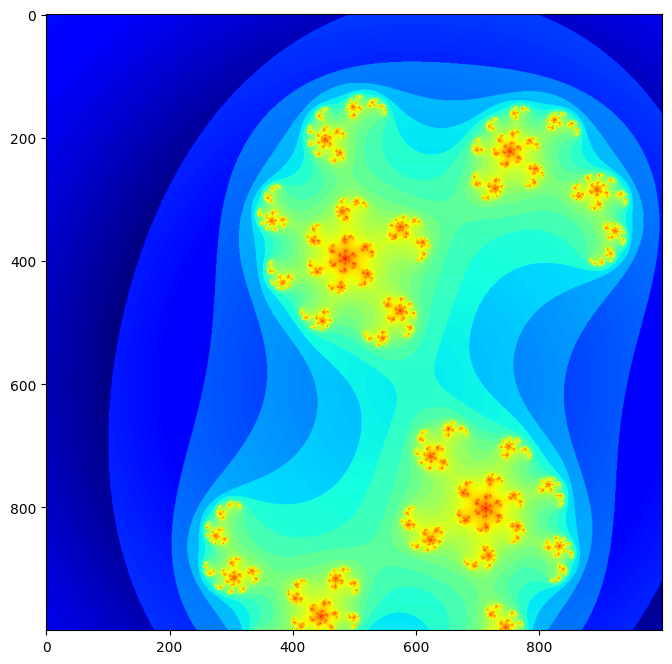

In [49]:
plt.figure(figsize=(8,8))
plt.imshow(mask.cpu())
plt.jet()
plt.show()